In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")



### 1. Annual Crime Trends: Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years.


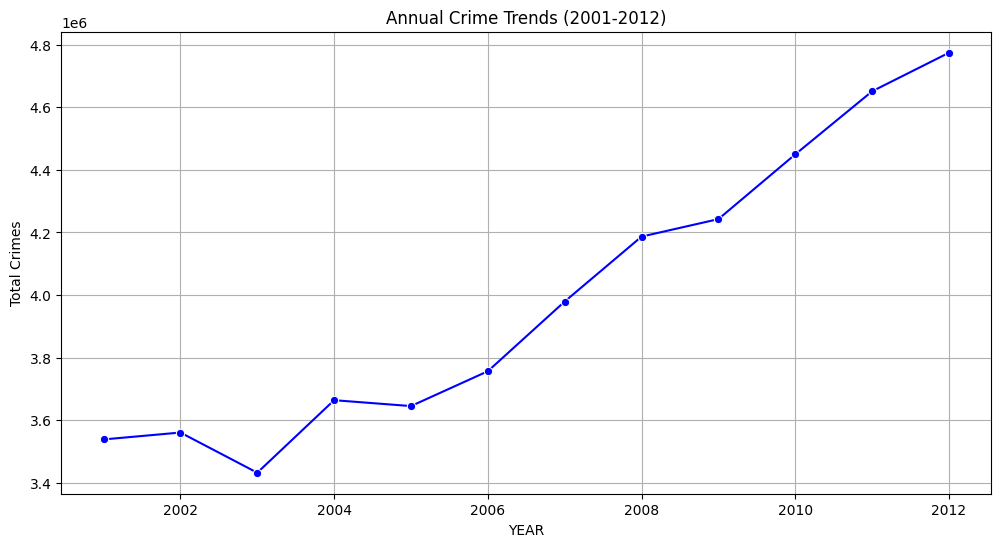

,YEAR,TOTAL IPC CRIMES
0,2001,3538616
1,2002,3560660
2,2003,3432240
3,2004,3664020
4,2005,3645204
5,2006,3756586
6,2007,3979346
7,2008,4186758
8,2009,4242690
9,2010,4449662


In [7]:

# Grouping data by Year and summing up total crimes
annual_crime_trends = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=annual_crime_trends['YEAR'], y=annual_crime_trends['TOTAL IPC CRIMES'], marker='o', color='b')

plt.xlabel("YEAR")
plt.ylabel("Total Crimes")
plt.title("Annual Crime Trends (2001-2012)")
plt.grid(True)
plt.show()

# Display data
annual_crime_trends


### 2. State-Wise Crime Analysis (2001-2012): Perform a comprehensive analysis of various crimes recorded in each state over the given period. Identify trends, anomalies, and patterns.

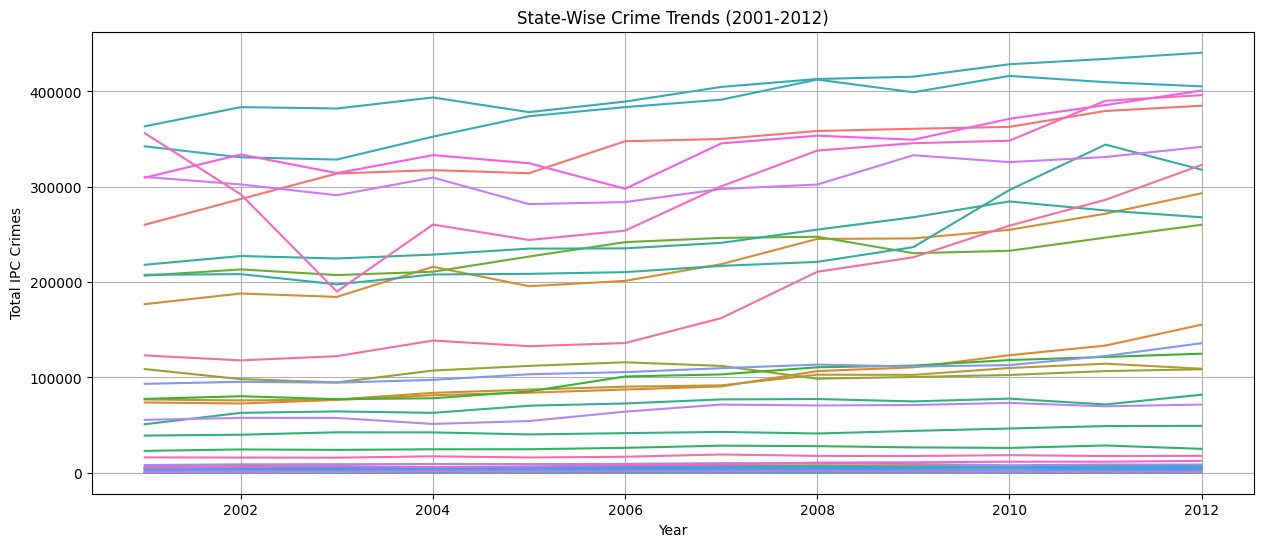

In [8]:
# Group data by State/UT and Year, summing up all crime counts
state_crime_trends = df.groupby(['STATE/UT', 'YEAR'])['TOTAL IPC CRIMES'].sum().reset_index()

# Visualizing state-wise crime trends over the years
plt.figure(figsize=(15, 6))
sns.lineplot(data=state_crime_trends, x="YEAR", y="TOTAL IPC CRIMES", hue="STATE/UT", legend=False)
plt.title("State-Wise Crime Trends (2001-2012)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.grid(True)
plt.show()


### 3. City-Wise Crime Distribution: For each state, identify the top six cities with the highest recorded crime incidents.

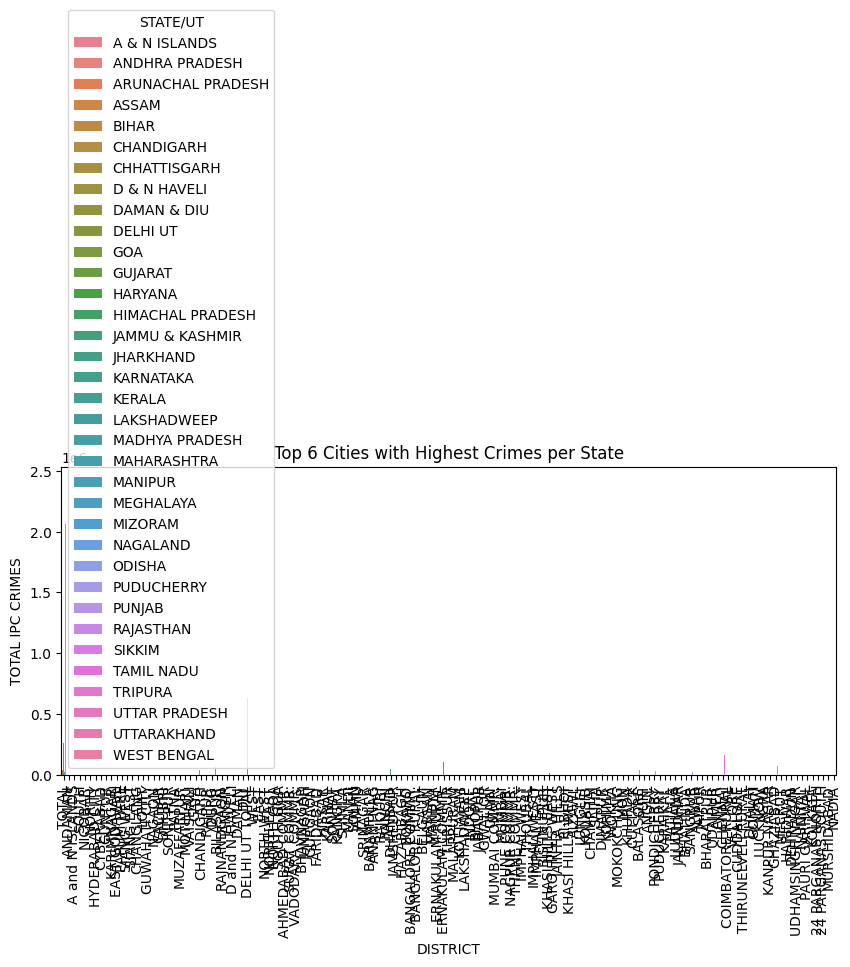

In [12]:
top_cities = df.groupby(['STATE/UT', 'DISTRICT'])['TOTAL IPC CRIMES'].sum().reset_index()
top_cities = top_cities.sort_values(['STATE/UT', 'TOTAL IPC CRIMES'], ascending=[True, False])

# Display top 6 cities per state
top_cities = top_cities.groupby('STATE/UT').head(6)

plt.figure(figsize=(10, 4))
sns.barplot(data=top_cities, x="DISTRICT", y="TOTAL IPC CRIMES", hue="STATE/UT")
plt.xticks(rotation=90)
plt.title("Top 6 Cities with Highest Crimes per State")
plt.show()


### 4. Highest Crime Rate States: Determine the top five states with the highest crime rates across all crime categories.

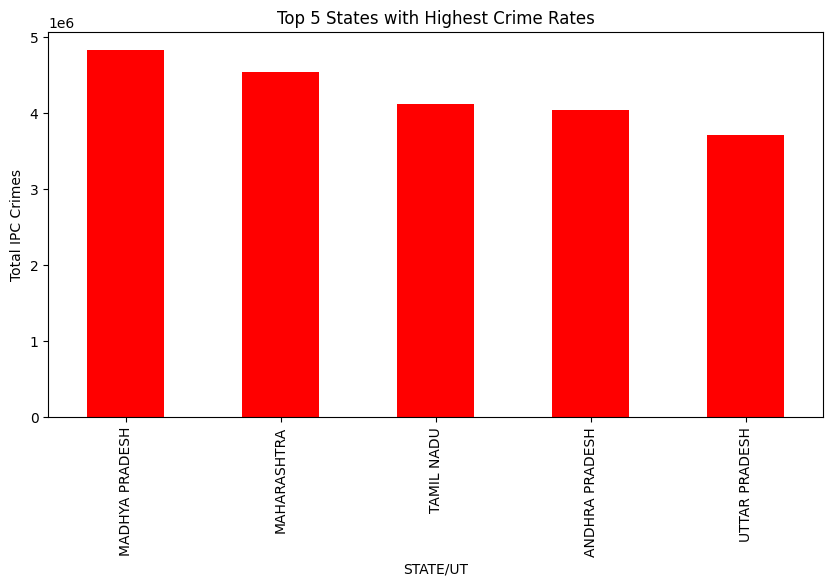

In [13]:
top_states = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().nlargest(5)
top_states.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Top 5 States with Highest Crime Rates")
plt.ylabel("Total IPC Crimes")
plt.show()


### 5. Crimes Against Women: Identify the top five cities with the highest number of crimes committed against women.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3164\3948652621.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_women.index, y=top_cities_women['total_women_crimes'], palette="Reds")


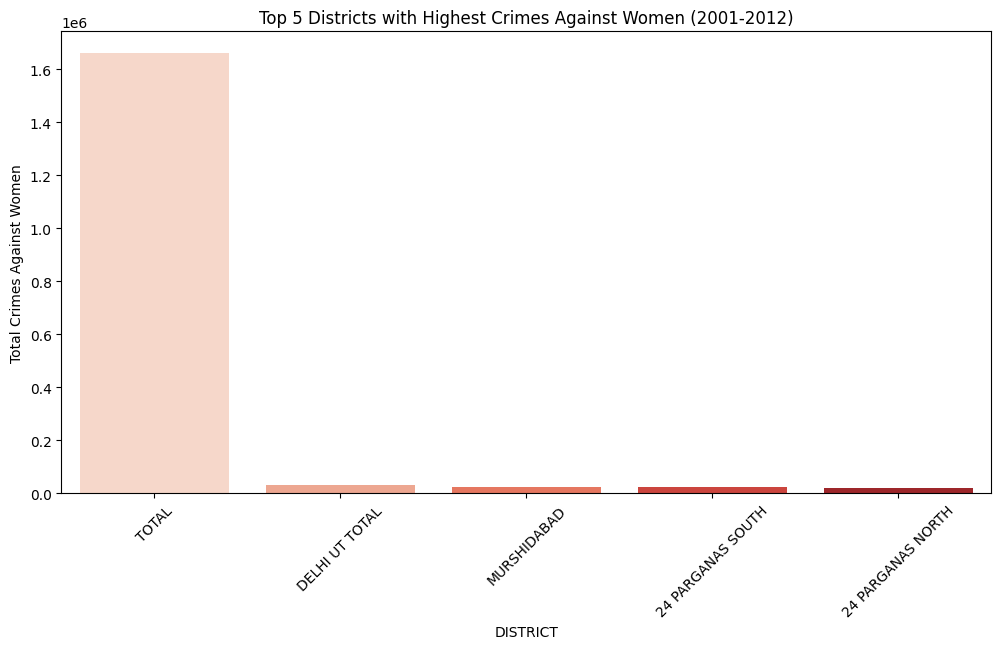

                     RAPE  \
DISTRICT                    
TOTAL              232713   
DELHI UT TOTAL       6424   
MURSHIDABAD          3352   
24 PARGANAS SOUTH    2221   
24 PARGANAS NORTH    1883   

                   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
DISTRICT                                                                 
TOTAL                                                         445621     
DELHI UT TOTAL                                                  7534     
MURSHIDABAD                                                     3487     
24 PARGANAS SOUTH                                               1438     
24 PARGANAS NORTH                                               1919     

                   INSULT TO MODESTY OF WOMEN  \
DISTRICT                                        
TOTAL                                  122367   
DELHI UT TOTAL                           1687   
MURSHIDABAD                                33   
24 PARGANAS SOUTH               

In [19]:

# Group data by district and sum up crimes against women
women_crimes = df.groupby('DISTRICT')[['RAPE', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES']].sum()

# Calculate total crimes against women per district
women_crimes['total_women_crimes'] = women_crimes.sum(axis=1)

# Get the top 5 districts with highest crimes against women
top_cities_women = women_crimes.nlargest(5, 'total_women_crimes')

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities_women.index, y=top_cities_women['total_women_crimes'], palette="Reds")
plt.xlabel("DISTRICT")
plt.ylabel("Total Crimes Against Women")
plt.title("Top 5 Districts with Highest Crimes Against Women (2001-2012)")
plt.xticks(rotation=45)
plt.show()

# Display results
print(top_cities_women)
 


### 6. Reasons Behind Violent Crimes: Using the dataset, analyze the primary reasons associated with incidents of kidnapping and murder.

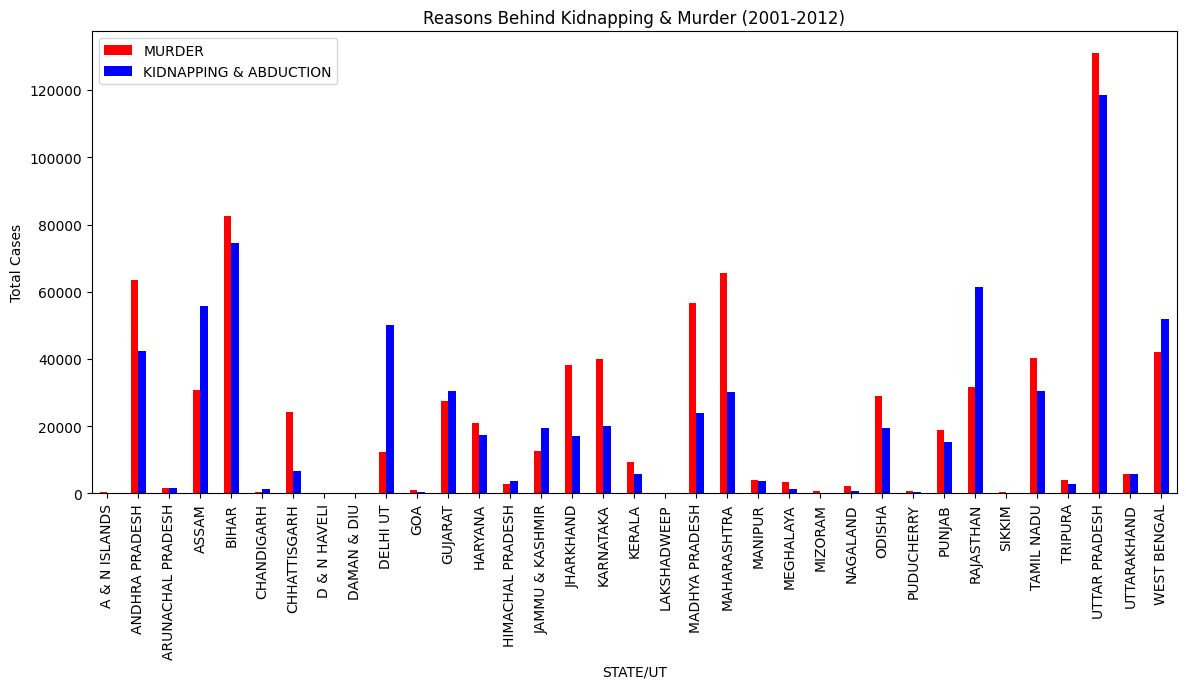

                MURDER  KIDNAPPING & ABDUCTION
STATE/UT                                      
UTTAR PRADESH   130886                  118532
BIHAR            82490                   74440
MAHARASHTRA      65534                   30202
ANDHRA PRADESH   63512                   42478
MADHYA PRADESH   56798                   23916
WEST BENGAL      42112                   51998
TAMIL NADU       40254                   30606
KARNATAKA        39874                   20058
JHARKHAND        38120                   16952
RAJASTHAN        31688                   61454


In [25]:
 
# Grouping data by State and summing up Murder & Kidnapping cases
violent_crimes = df.groupby('STATE/UT')[['MURDER', 'KIDNAPPING & ABDUCTION']].sum()

# Plot the results
violent_crimes.plot(kind='bar', figsize=(14, 6), color=['red', 'blue'])
plt.xlabel("STATE/UT")
plt.ylabel("Total Cases")
plt.title("Reasons Behind Kidnapping & Murder (2001-2012)")
plt.legend(["MURDER", "KIDNAPPING & ABDUCTION"])
plt.xticks(rotation=90)
plt.show()

# Display the top states with the highest murder & kidnapping cases
print(violent_crimes.sort_values(by=['MURDER', 'KIDNAPPING & ABDUCTION'], ascending=False).head(10))
 

### 7. Crime Pair Analysis: Identify the top ten pairs of crimes where one crime tends to lead to another (e.g., kidnapping leading to murder, custodial torture leading to custodial death, rape leading to murder, etc.).

In [27]:
 
# Drop non-numeric columns before computing correlation
numeric_df = df.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Unstack the matrix to get crime pairs
crime_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Remove self-correlations (where crime is correlated with itself)
crime_pairs = crime_pairs[crime_pairs < 1].drop_duplicates().head(10)

# Display top 10 most correlated crime pairs
print(crime_pairs)
 

OTHER RAPE              RAPE                                           1.000000
KIDNAPPING & ABDUCTION  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS    0.981832
OTHER THEFT             THEFT                                          0.975227
ATTEMPT TO MURDER       MURDER                                         0.958120
TOTAL IPC CRIMES        OTHER IPC CRIMES                               0.951858
AUTO THEFT              THEFT                                          0.932958
TOTAL IPC CRIMES        HURT/GREVIOUS HURT                             0.922862
OTHER THEFT             BURGLARY                                       0.920293
THEFT                   BURGLARY                                       0.915529
                        TOTAL IPC CRIMES                               0.910790
dtype: float64


### 8. Safest States for Women: Determine the top five states that are statistically the safest for women, based on crime rates related to women’s safety.

In [30]:
# Relevant crime columns related to women's safety
women_safety_columns = [
    "RAPE",
    "CUSTODIAL RAPE",
    "OTHER RAPE",
    "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS",
    "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY",
    "INSULT TO MODESTY OF WOMEN",
    "CRUELTY BY HUSBAND OR HIS RELATIVES",
    "DOWRY DEATHS",
    "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES"
]

# Aggregate total crimes against women per state
women_crime_per_state = df.groupby("STATE/UT")[women_safety_columns].sum()

# Compute crime rate per state (total women's crimes / total IPC crimes)
women_crime_per_state["TOTAL_WOMEN_CRIMES"] = women_crime_per_state.sum(axis=1)
statewise_total_crimes = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum()

# Calculate women's crime percentage per state
women_crime_per_state["WOMEN_CRIME_RATE"] = (women_crime_per_state["TOTAL_WOMEN_CRIMES"] / statewise_total_crimes) * 100

# Identify 5 safest states (lowest percentage of crimes against women)
safest_states_for_women = women_crime_per_state["WOMEN_CRIME_RATE"].nsmallest(5)

safest_states_for_women


STATE/UT
PUDUCHERRY     2.407791
LAKSHADWEEP    3.633917
TAMIL NADU     3.700266
DAMAN & DIU    3.731343
GOA            4.758042
Name: WOMEN_CRIME_RATE, dtype: float64

### 9. Safest Cities for Women: Identify the top five cities with the lowest crime rates against women.

In [33]:
# Group by district and sum up crimes against women
women_crime_per_city = df.groupby("DISTRICT")[women_safety_columns].sum()

# Compute total women's crimes per city
women_crime_per_city["TOTAL_WOMEN_CRIMES"] = women_crime_per_city.sum(axis=1)

# Compute crime rate per city (women's crimes / total IPC crimes per city)
citywise_total_crimes = df.groupby("DISTRICT")["TOTAL IPC CRIMES"].sum()
women_crime_per_city["WOMEN_CRIME_RATE"] = (women_crime_per_city["TOTAL_WOMEN_CRIMES"] / citywise_total_crimes) * 100

# Identify 5 safest cities (lowest percentage of crimes against women)
safest_cities_for_women = women_crime_per_city["WOMEN_CRIME_RATE"].nsmallest(5)

safest_cities_for_women


DISTRICT
BIEO              0.0
CID               0.0
CRIME JAMMU       0.0
CRIME KASHMIR     0.0
CRIME SRINAGAR    0.0
Name: WOMEN_CRIME_RATE, dtype: float64

### 10. Profile of Rape Offenders: Categorize and rank the top three relationships between rape offenders and their victims based on recorded data.

### 11. Socioeconomic Factors and Crime:
### a. Analyze whether there is a correlation between a person’s salary and their likelihood of engaging in criminal activities.
### b. Examine how literacy rates influence the likelihood of an individual being involved in crimes.

In [35]:
# Since the dataset does not have salary or literacy rate information, I'll check if there are any related columns
socioeconomic_columns = [col for col in df.columns if "LITERACY" in col or "SALARY" in col]

# Display available socioeconomic columns (if any)
socioeconomic_columns


[]

### 12. Juvenile Crime Analysis:
### a. Identify the top three reasons at the state level for juveniles (individuals under 18 years of age) being involved in crimes.
### b. Determine the top ten states with the highest number of juvenile crime cases.

In [37]:

# Check if dataset contains specific columns related to juvenile crimes
juvenile_columns = [col for col in df.columns if "JUVENILE" in col]

# Display available juvenile crime-related columns (if any)
juvenile_columns


[]

### 13. Crime Rate Trends Over Time: Calculate the rate of change in total crimes for each state over the given timeline and identify states with significant increases or decreases.

In [39]:

# Group data by state and year, summing up total IPC crimes
crime_trends = df.groupby(["STATE/UT", "YEAR"])["TOTAL IPC CRIMES"].sum().reset_index()

# Compute the rate of change in total crimes for each state
crime_trends["CRIME_CHANGE"] = crime_trends.groupby("STATE/UT")["TOTAL IPC CRIMES"].pct_change() * 100

# Identify states with the highest increase and decrease in crime rate
crime_trend_summary = crime_trends.groupby("STATE/UT")["CRIME_CHANGE"].mean().sort_values()

# Top 5 states with the highest increase in crime rate
highest_increase_states = crime_trend_summary.nlargest(5)

# Top 5 states with the highest decrease in crime rate
highest_decrease_states = crime_trend_summary.nsmallest(5)

highest_increase_states, highest_decrease_states


(STATE/UT
 LAKSHADWEEP    21.378159
 WEST BENGAL     9.580638
 TRIPURA         7.993488
 ASSAM           7.151771
 BIHAR           4.928274
 Name: CRIME_CHANGE, dtype: float64,
 STATE/UT
 NAGALAND            -0.879816
 D & N HAVELI        -0.399392
 DELHI UT             0.208911
 ARUNACHAL PRADESH    0.421443
 PUDUCHERRY           0.718202
 Name: CRIME_CHANGE, dtype: float64)

### 14. Crime Distribution by State: Compute and visualize the percentage share of each type of crime for all states to understand the distribution of criminal activities.

In [41]:
# Compute total crimes per state across all years
statewise_crime_distribution = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum()

# Compute percentage share of each state in total crime
statewise_crime_distribution_pct = (statewise_crime_distribution / statewise_crime_distribution.sum()) * 100

# Convert to DataFrame for visualization
statewise_crime_distribution_df = statewise_crime_distribution_pct.reset_index()
statewise_crime_distribution_df.columns = ["STATE/UT", "CRIME_PERCENTAGE"]

# Display top states with the highest crime distribution
statewise_crime_distribution_df.sort_values("CRIME_PERCENTAGE", ascending=False).head(10)


,STATE/UT,CRIME_PERCENTAGE
19,MADHYA PRADESH,10.082306
20,MAHARASHTRA,9.496132
30,TAMIL NADU,8.605346
1,ANDHRA PRADESH,8.433274
32,UTTAR PRADESH,7.761166
28,RAJASTHAN,7.752152
16,KARNATAKA,6.186393
17,KERALA,6.004260
11,GUJARAT,5.788376
4,BIHAR,5.623460
